In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Path to training data
DATA_PATH = r"C:\Cats_Dogs_SVM_Project\data\train"

images = []
labels = []

print("Loading images...")

files = os.listdir(DATA_PATH)

cat_count = 0
dog_count = 0

for file in files:
    img_path = os.path.join(DATA_PATH, file)

    if file.startswith("cat") and cat_count < 50:
        label = 0
        cat_count += 1
    elif file.startswith("dog") and dog_count < 50:
        label = 1
        dog_count += 1
    else:
        continue

    img = cv2.imread(img_path)
    if img is None:
        continue

    img = cv2.resize(img, (16, 16))
    img = img.flatten()

    images.append(img)
    labels.append(label)

    if cat_count == 50 and dog_count == 50:
        break

print("Images loaded.")
print("Cats:", cat_count, "Dogs:", dog_count)
X = np.array(images)
y = np.array(labels)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training SVM model...")

model = SVC(kernel='linear')
model.fit(X_train, y_train)

print("Model trained.")

# Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model
os.makedirs("model", exist_ok=True)
with open("model/svm_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully.")

Loading images...
Images loaded.
Cats: 50 Dogs: 50
Training SVM model...
Model trained.
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.42      0.62      0.50         8

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.50        20
weighted avg       0.54      0.50      0.50        20

Model saved successfully.


In [3]:
import os
print(os.getcwd())

C:\Users\hp


In [5]:
import os
import pickle

project_path = r"C:\Cats_Dogs_SVM_Project"
model_folder = os.path.join(project_path, "model")

# create model folder if not exists
os.makedirs(model_folder, exist_ok=True)

model_path = os.path.join(model_folder, "svm_model.pkl")

with open(model_path, "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully at:", model_path)

Model saved successfully at: C:\Cats_Dogs_SVM_Project\model\svm_model.pkl


Confusion Matrix:
[[5 7]
 [3 5]]


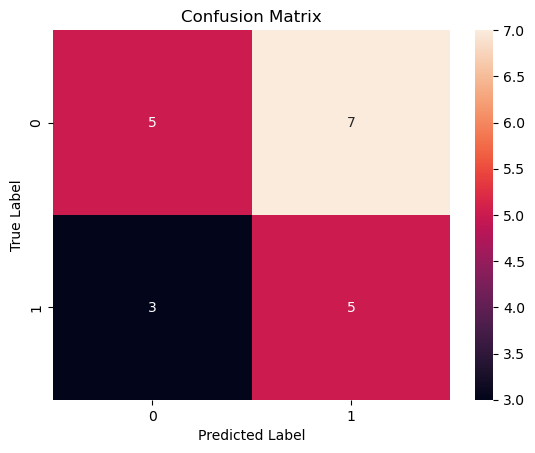

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()